In [102]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\numan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\numan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\numan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [104]:
# Importing the dataset
import pandas as pd
df = pd.read_csv("imdb_data.csv")

In [106]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [108]:
df.describe()

,review,sentiment
count,46055,46054
unique,45713,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,23057


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46055 entries, 0 to 46054
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     46055 non-null  object
 1   sentiment  46054 non-null  object
dtypes: object(2)
memory usage: 719.7+ KB


In [112]:
df.isnull().sum()

review       0
sentiment    1
dtype: int64

In [114]:
# dropping empty/null rows
df.dropna(inplace = True)

In [116]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

sentiment
positive    23057
negative    22997
Name: count, dtype: int64

----------------------------------------------------------------------------------------------------------------


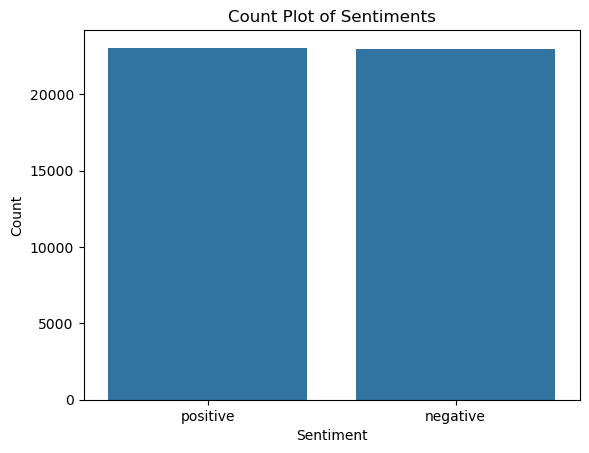

In [118]:
# Checking the number of positive and negative value counts and visualizing it
print(df["sentiment"].value_counts())
print("\n----------------------------------------------------------------------------------------------------------------")
sns.countplot(x=df["sentiment"]).set(title="Count Plot of Sentiments", xlabel="Sentiment", ylabel="Count")
plt.show()

In [120]:
# Analyzing the lenght of the reviews column
df['l_review'] = df['review'].apply(lambda x: len(x.split()))


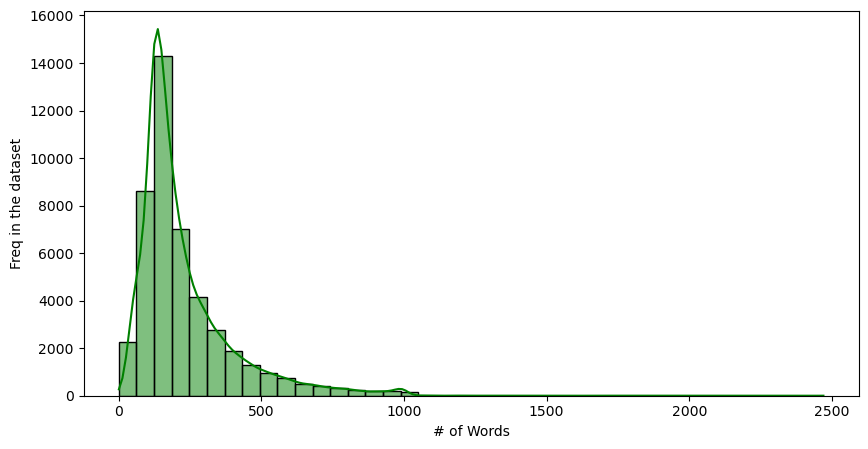

In [122]:
# VIsualizing the review column
plt.figure(figsize=(10,5))
sns.histplot(df['l_review'], bins=40, kde=True, color='green')
plt.xlabel('# of Words')
plt.ylabel('Freq in the dataset')
plt.show()

In [124]:
# preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()



def preprocess_text(text):
    if not isinstance(text, str): # Ensure input is a string
        return ""

    # Remove HTML tags properly
    text = re.sub(r"<.*?>", "", text)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Keep only letters and spaces
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Rejoin words into cleaned text
    return ' '.join(tokens)


# Apply preprocessing
df['cleaned_review'] = df['review'].apply(preprocess_text)
# Sample after cleaning

print("\nSample Review After Cleaning:")
print(df['cleaned_review'].iloc[0])


Sample Review After Cleaning:
one reviewer mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle 

In [126]:
# Vectorization

# Bag of Words (BoW)
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['cleaned_review'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_review'])
print("\nBoW Matrix Shape:", X_bow.shape)
print("\nTF-IDF Matrix Shape:", X_tfidf.shape)

# Preview sample BoW features
print("\nSample BoW Features:")

print(bow_vectorizer.get_feature_names_out()[:50])

# Preview sample TF-IDF features
print("\nSample TF-IDF Features:")
print(tfidf_vectorizer.get_feature_names_out()[:50])


BoW Matrix Shape: (46054, 192860)

TF-IDF Matrix Shape: (46054, 192860)

Sample BoW Features:
['aa' 'aaa' 'aaaaaaaaaaaahhhhhhhhhhhhhh' 'aaaaaaaargh' 'aaaaaaah'
 'aaaaaaahhhhhhggg' 'aaaaagh' 'aaaaah' 'aaaaargh'
 'aaaaarrrrrrgggggghhhhhh' 'aaaaatchkah' 'aaaaaw' 'aaaahhhhhh'
 'aaaahhhhhhh' 'aaaand' 'aaaarrgh' 'aaaawwwwww' 'aaaggghhhhhhh' 'aaaghi'
 'aaah' 'aaahthe' 'aaall' 'aaand' 'aaargh' 'aaarghhow' 'aaarrrghim'
 'aaaugh' 'aab' 'aachen' 'aada' 'aadha' 'aadmittedly' 'aag' 'aage' 'aaghh'
 'aah' 'aahed' 'aahemy' 'aahhh' 'aahhhh' 'aahing' 'aaila' 'aailiyah'
 'aaip' 'aaja' 'aajala' 'aak' 'aakash' 'aake' 'aaker']

Sample TF-IDF Features:
['aa' 'aaa' 'aaaaaaaaaaaahhhhhhhhhhhhhh' 'aaaaaaaargh' 'aaaaaaah'
 'aaaaaaahhhhhhggg' 'aaaaagh' 'aaaaah' 'aaaaargh'
 'aaaaarrrrrrgggggghhhhhh' 'aaaaatchkah' 'aaaaaw' 'aaaahhhhhh'
 'aaaahhhhhhh' 'aaaand' 'aaaarrgh' 'aaaawwwwww' 'aaaggghhhhhhh' 'aaaghi'
 'aaah' 'aaahthe' 'aaall' 'aaand' 'aaargh' 'aaarghhow' 'aaarrrghim'
 'aaaugh' 'aab' 'aachen' 'aada' 'aadha' '

In [128]:
import gensim
from gensim.models import Word2Vec
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limit to 5000 features
# Transform text data into TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(df["cleaned_review"])
# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# Display sample TF-IDF features
print(tfidf_df.head())

   aaron  abandoned  abc  ability  able  abrupt  absence  absent  absolute  \
0    0.0        0.0  0.0      0.0   0.0     0.0      0.0     0.0       0.0   
1    0.0        0.0  0.0      0.0   0.0     0.0      0.0     0.0       0.0   
2    0.0        0.0  0.0      0.0   0.0     0.0      0.0     0.0       0.0   
3    0.0        0.0  0.0      0.0   0.0     0.0      0.0     0.0       0.0   
4    0.0        0.0  0.0      0.0   0.0     0.0      0.0     0.0       0.0   

   absolutely  ...  youd     youll     young  younger     youre  youth  youve  \
0         0.0  ...   0.0  0.058207  0.000000      0.0  0.000000    0.0    0.0   
1         0.0  ...   0.0  0.000000  0.000000      0.0  0.000000    0.0    0.0   
2         0.0  ...   0.0  0.000000  0.080361      0.0  0.000000    0.0    0.0   
3         0.0  ...   0.0  0.000000  0.000000      0.0  0.081712    0.0    0.0   
4         0.0  ...   0.0  0.000000  0.000000      0.0  0.000000    0.0    0.0   

   zero    zombie  zone  
0   0.0  0.000000 

In [130]:
# Tokenize reviews for Word2Vec
df['tokenized_review'] = df['cleaned_review'].apply(lambda x:word_tokenize(str(x).lower()))
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokenized_review'], vector_size=100, window=5, min_count=2, workers=4)
# Function to get review embeddings by averaging word vectors
def get_word2vec_embedding(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * 100 # Handling empty tokens
# Apply function to get Word2Vec embeddings
df['word2vec_embedding'] = df['tokenized_review'].apply(lambda x:get_word2vec_embedding(x, word2vec_model))
# Show first few embeddings
df[['word2vec_embedding']].head()

,word2vec_embedding
0,"[-0.36661482, 0.45929754, 0.26780674, -0.15357..."
1,"[-0.08865055, 0.5667219, -0.58206546, 0.238113..."
2,"[-0.36259583, 0.22964624, -0.31624943, 0.13667..."
3,"[-0.4841763, 0.27168053, 0.0050521833, 0.02832..."
4,"[-0.105996676, 0.18598995, -0.06704725, -0.031..."


In [132]:
# Word count (number of words in a review)
df['word_count'] = df['cleaned_review'].apply(lambda x: len(str(x).split()))

# Character count (total number of characters in a review)
df['char_count'] = df['cleaned_review'].apply(lambda x: len(str(x)))

# Average word length (ratio of character count to word count)
df['avg_word_length'] = df['char_count'] / df['word_count']
df[['cleaned_review', 'word_count', 'char_count', 'avg_word_length']].head()

,cleaned_review,word_count,char_count,avg_word_length
0,one reviewer mentioned watching oz episode you...,167,1125,6.736527
1,wonderful little production filming technique ...,84,640,7.619048
2,thought wonderful way spend time hot summer we...,85,580,6.823529
3,basically there family little boy jake think t...,66,446,6.757576
4,petter matteis love time money visually stunni...,125,851,6.808000


## Modelling

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
# Convert sentiment labels into binary values (1 for positive, 0 for negative)
# Map only if values are still strings (positive/negative)
if df['sentiment'].dtype == 'object':  
    df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000) # Limiting to 5000 features
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
# Naive Bayes Model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_nb = naive_bayes_model.predict(X_test)
# Evaluating
print("Naive Bayes Performance:------------------------------------------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("F1-score:", f1_score(y_test, y_pred_nb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Performance:------------------------------------------------------------
Accuracy: 0.850830528715666
F1-score: 0.8530795551753636
ROC-AUC: 0.8507636735052228
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4557
           1       0.85      0.86      0.85      4654

    accuracy                           0.85      9211
   macro avg       0.85      0.85      0.85      9211
weighted avg       0.85      0.85      0.85      9211



In [173]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluating
print("Logistic Regression Performance:---------------------------------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Performance:---------------------------------------------------
Accuracy: 0.8806861361415699
F1-score: 0.8828732814664819
ROC-AUC: 0.8805871462077215
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4557
           1       0.88      0.89      0.88      4654

    accuracy                           0.88      9211
   macro avg       0.88      0.88      0.88      9211
weighted avg       0.88      0.88      0.88      9211



In [175]:
# Random Forrest Model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [177]:
# Evaluate Model
print("Random Forest Performance:---------------------------------------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:---------------------------------------------------------
Accuracy: 0.8418195635653024
F1-score: 0.8422648045902349
ROC-AUC: 0.8418832023986105
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4557
           1       0.85      0.84      0.84      4654

    accuracy                           0.84      9211
   macro avg       0.84      0.84      0.84      9211
weighted avg       0.84      0.84      0.84      9211



                 Model  Accuracy  F1-score   ROC-AUC
0          Naive Bayes  0.850831  0.853080  0.850764
1  Logistic Regression  0.880686  0.882873  0.880587
2        Random Forest  0.841820  0.842265  0.841883


C:\Users\numan\AppData\Local\Temp\ipykernel_14768\1044640117.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Model", y = "Accuracy", data = model_results, palette = "coolwarm")


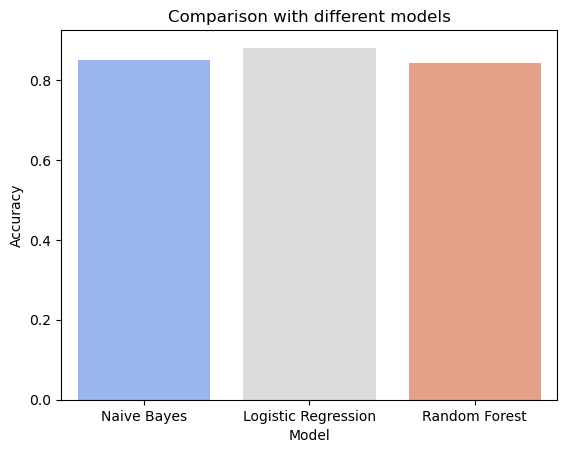

In [205]:
# Gather, summarize and visualize the results
model_results = pd.DataFrame({
"Model": ["Naive Bayes", "Logistic Regression", "Random Forest"],
"Accuracy": [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)],
"F1-score": [f1_score(y_test, y_pred_nb), f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_rf)],
"ROC-AUC": [roc_auc_score(y_test, y_pred_nb), roc_auc_score(y_test, y_pred_lr), roc_auc_score(y_test, y_pred_rf)]
})

print(model_results)

# Visualize the results
sns.barplot(x = "Model", y = "Accuracy", data = model_results, palette = "coolwarm")
plt.title("Comparison with different models")
plt.show()

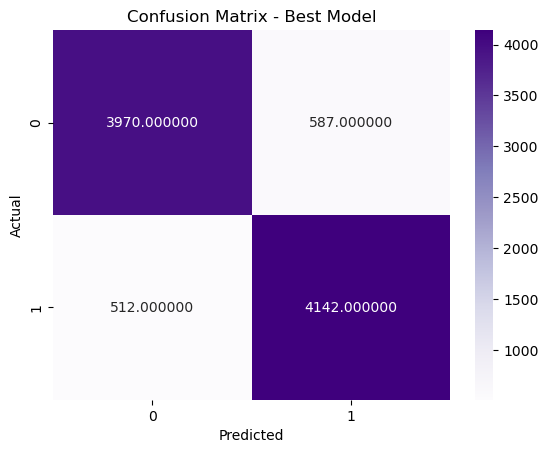

In [255]:
# Choosing best model (Logistic Regression Model)
best_model = lr_model
y_pred_best = y_pred_lr

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='f', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best Model")
plt.show()

## Report Link

https://docs.google.com/document/d/19W9f6yg_486Q-3CN1gXPffG2WAbm4pcO/edit?usp=sharing&ouid=101091923509442736382&rtpof=true&sd=true

## Video presentation link

https://drive.google.com/file/d/1e_HFK0Hbxj-B94CGyiuhuNRbZwUg25_y/view?usp=sharing